<a href="https://colab.research.google.com/github/AbhayRajawat-cloud/ML_project/blob/main/FacebookProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading the Dataset

In [ ]:
df=pd.read_csv('Facebook_Marketplace_data.csv')

Converting status_published to date time format

In [ ]:
df['status_published']=pd.to_datetime(df['status_published'])

In [ ]:
df['hours']=df['status_published'].dt.hour
df['day_of_week']=df['status_published'].dt.dayofweek
Z=df[['hours','day_of_week']]
print(Z)

      hours  day_of_week
0         6            6
1        22            5
2         6            5
3         2            5
4         3            2
...     ...          ...
7045      2            5
7046     11            4
7047     23            2
7048      0            1
7049     10            5

[7050 rows x 2 columns]


#Effect of Time on Reactions

In [ ]:
hourly_avg=df.groupby('hours')['num_reactions'].mean()
print(hourly_avg)

hours
0     261.839474
1     203.315725
2     163.907618
3     290.270208
4     242.685864
5     293.870968
6     340.213198
7     183.301549
8     204.796897
9     205.780761
10    234.508333
11    180.639456
12    196.053763
13    176.875000
14    261.333333
15    341.666667
16    283.250000
17    384.000000
18    351.750000
19    442.368421
20    417.288136
21    261.907895
22    238.376126
23    244.276850
Name: num_reactions, dtype: float64


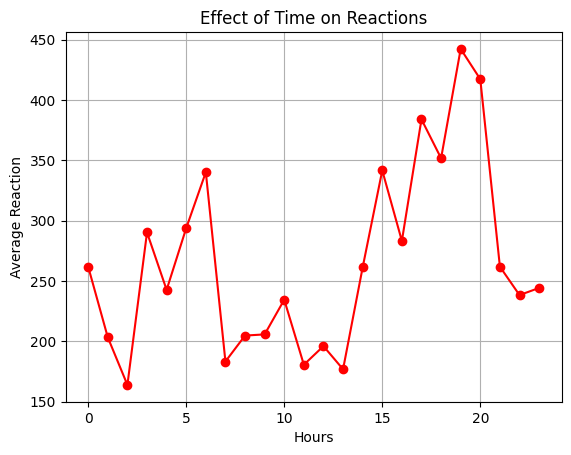

In [ ]:
plt.plot(hourly_avg.index,hourly_avg.values,color='red',marker='o')
plt.title('Effect of Time on Reactions')
plt.xlabel('Hours')
plt.ylabel('Average Reaction')
plt.grid(True)
plt.show()

#Correlation Btw Different Attributes

In [ ]:
correlation_matrix=df[['num_reactions','num_comments','num_shares']].corr()
print("Correlation Matrix:\n", correlation_matrix)

#A strong correlation (close to 1) suggests a strong relationship between reactions, comments, and shares"
#A weak correlation (close to 0) suggests no relationship.

Correlation Matrix:
                num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


#KMeans Clustering

#Data Preprocessing

In [ ]:
features=['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
X=df[features].fillna(0)
X_scaled=StandardScaler().fit_transform(X)
print(X)
print("\n")
print(X_scaled)

      num_reactions  num_comments  num_shares  num_likes  ...  num_wows  num_hahas  num_sads  num_angrys
0               529           512         262        432  ...         3          1         1           0
1               150             0           0        150  ...         0          0         0           0
2               227           236          57        204  ...         1          1         0           0
3               111             0           0        111  ...         0          0         0           0
4               213             0           0        204  ...         0          0         0           0
...             ...           ...         ...        ...  ...       ...        ...       ...         ...
7045             89             0           0         89  ...         0          0         0           0
7046             16             0           0         14  ...         0          1         0           0
7047              2             0           0          

#Finding Optimal Number of Clusters Using the Elbow Method

In [ ]:
wcss=[]

In [ ]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42,n_init=10)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

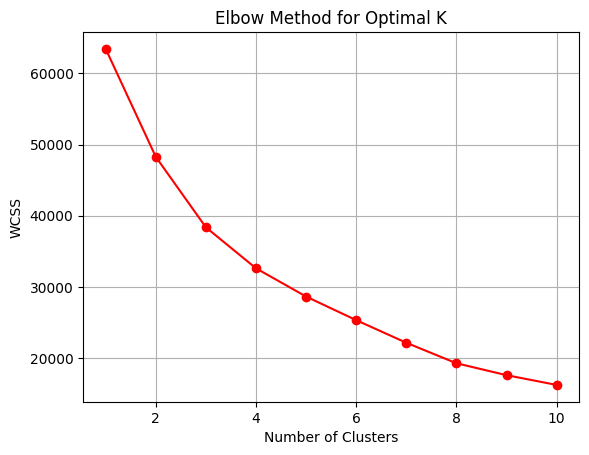

In [ ]:
plt.plot(range(1,11), wcss, marker='o', linestyle='-',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()
#No.of Cluster = 4

#Training the Kmeans model on the Dataset

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=42,n_init=10)
df['cluster']=kmeans.fit_predict(X_scaled)
y_means=kmeans.fit_predict(X_scaled)
z=df.iloc[:,:].values
print(z)

[[1 'video' Timestamp('2018-04-22 06:00:00') ... 6 6 0]
 [2 'photo' Timestamp('2018-04-21 22:45:00') ... 22 5 0]
 [3 'video' Timestamp('2018-04-21 06:17:00') ... 6 5 0]
 ...
 [7048 'photo' Timestamp('2016-09-21 23:03:00') ... 23 2 0]
 [7049 'photo' Timestamp('2016-09-20 00:43:00') ... 0 1 0]
 [7050 'photo' Timestamp('2016-09-10 10:30:00') ... 10 5 0]]


#Counting the Different type of post in Dataset

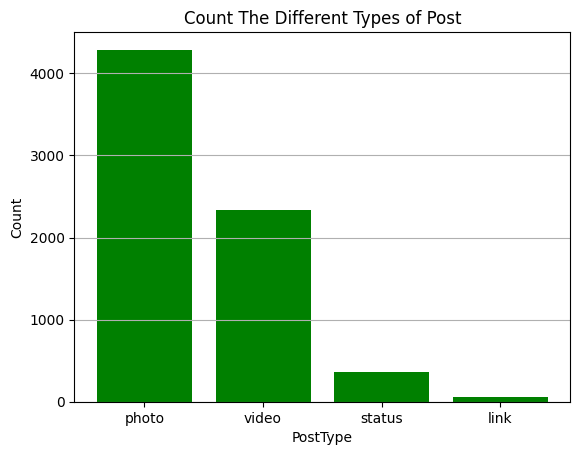

In [ ]:
post_counts=df['status_type'].value_counts()
plt.bar(post_counts.index, post_counts.values,color='green')
plt.xlabel('PostType')
plt.ylabel('Count')
plt.title('Count The Different Types of Post')
plt.grid(axis='y')
plt.show()

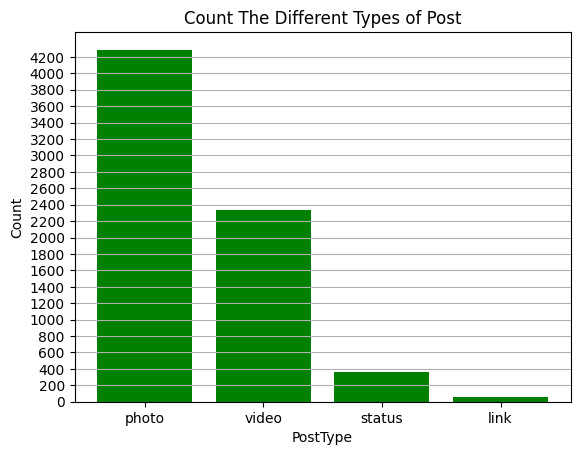

In [ ]:
#A more detailed Graph
post_counts=df['status_type'].value_counts()
plt.bar(post_counts.index, post_counts.values,color='green')
plt.xlabel('PostType')
plt.ylabel('Count')
plt.title('Count The Different Types of Post')
plt.grid(axis='y')
plt.yticks(range(0,max(post_counts.values),200))
plt.show()

#Average value of num_reaction, num_comments, num_shares for each post type

In [ ]:
engagement_avg=df.groupby('status_type')[['num_reactions','num_comments','num_shares']].mean()
print("Average Engagement of Each Post Type:\n", engagement_avg)

Average Engagement of Each Post Type:
              num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
